Getting Started With OpenCV

Getting started with OpenCV

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Importing OpenCV to perform image processing

In [5]:
import cv2

Now let's read an image 

In [6]:
img = cv2.imread('E:\img_1.png')
img.shape

(675, 1200, 3)

In [7]:
img[0]

array([[157, 141, 129],
       [157, 141, 129],
       [158, 142, 130],
       ...,
       [125, 132, 129],
       [125, 132, 129],
       [124, 131, 128]], dtype=uint8)

Importing matplotlib to visualize the image

In [9]:
import matplotlib.pyplot as plt

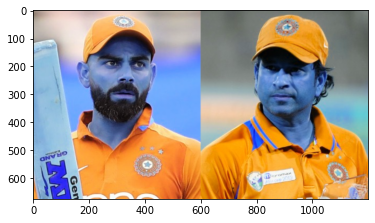

In [10]:
plt.imshow(img)

Open an image into the new tab

In [11]:
while True:
    cv2.imshow('result' ,img)
    if cv2.waitKey(2) == 27:
    #27 is the ASCII of Escape
        break
cv2.destroyAllWindows()

Face Detection Using OpenCV

 The algorithm is divided into four stages :

1.Haar Features Selection
2.Integral Images
3.AdaBoost
4.Cascading Classifier

In [8]:
haar_data = cv2.CascadeClassifier('C:\Anaconda\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')

In [9]:
haar_data.detectMultiScale(img)

array([[ 198,   89,  264,  264],
       [ 714,   26,  463,  463],
       [ 768,  115,  250,  250],
       [1071,  584,   56,   56]])

In [10]:
# cv2.rectangle(img, (x,y), (w, h), (b,g,r), border_thickness)

In [11]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y),(x+w, y+h), (255,0,255), 4)
    cv2.imshow('result' ,img)
    if cv2.waitKey(2) == 27:
    #27 is the ASCII of Escape
        break
cv2.destroyAllWindows()

Code to perform face detection using camera and storing face data only

In [ ]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face=img[y:y+h,x:x+w,:]
            face=cv2.resize(face,((50,50)))
            print(len(data))
            if len(data)<400:
                data.append(face)
        cv2.imshow('result', img)
        #27 - ASCII of Escape
        if cv2.waitKey(2) == 27 or len(data)>=200:
            break
capture.release()
cv2.destroyAllWindows ()

Importing numpy library 

In [ ]:
import numpy as np

In [2]:
#Save the data in a numpy file and you can also plot the face data to check the data collected by OpenCV


In [ ]:
np.save('without_mask.npy',data)

In [ ]:
np.save('with_mask.npy',data)

In [ ]:
plt.imshow(data[0])

Starting with the Machine Learning

In [ ]:
import numpy as np
import cv2

Reshape the Data to make it  into 2D image 

In [ ]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [ ]:
with_mask.shape

In [ ]:
without_mask.shape


In [1]:
#Now we can see that data is loaded with the shape 200, 50, 50, 3.

# Here 200 is the number of images we have collected
#50, 50 is the size of each image
#3 is the color channel (red, green, blue)


 Reshape the data to make it 2D

In [ ]:
with_mask=with_mask.reshape(200,50*50*3)
without_mask=without_mask.reshape(200,50*50*3)

In [ ]:
with_mask.shape

In [2]:
# Concatenate the data into a single array

In [ ]:
X=np.r_[with_mask,without_mask]

In [ ]:
X.shape

In [ ]:
labels = np.zeros(X.shape[0])

In [ ]:
labels[200:] = 1.0

In [ ]:
names = {0 : 'Mask', 1: 'No Mask'}

Apply Machine Learning On Our Data

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size=0.25)

In [ ]:
x_train.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size=0.21)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

In [ ]:
#x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
haar_data = cv2.CascadeClassifier('C:\Anaconda\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
capture = cv2.VideoCapture(0)
data = []
font=cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h,x:x+w,:]
            face = cv2.resize(face,((50,50)))
            face = face.reshape(1,-1)
            #face = pca.transform(face)
            pred = svm.predict(face)
            n = names[int(pred)]
            cv2.putText(img,n,(x,y),font,1,(244,250,250),2)
            print(n)
        cv2.imshow('result', img)
        #27 - ASCII of Escape
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows ()

In [ ]:
#finally project is Completed with reasonable accuracy .
